# Notes

[Coeficiente de Determinação R2](https://pt.wikipedia.org/wiki/R%C2%B2)

[Tabela Periódica do Data Science](https://www.datacamp.com/community/blog/data-science-periodic-table)

Crawlers: selenium e nightwatch

Scrapy = mais pra webscraping do que pra crawler

One Hot Encoding - variáveis burras


### Curiosidades do Lages

[Tweetping](tweetping.net)

[Alerta para Desastres do Twitter](https://entretenimento.band.uol.com.br/agoraedomingo/noticias/100000633584/twitter-faz-sistema-de-alerta-para-desastres.html)

[Clarifai - Análise de vídeos em tempo real, com elementos](https://clarifai.com/)

### Curiosidade do Paulo

[Algorithmia - Disponibilizar APIs para uso e receber por isso](https://algorithmia.com/)

Keras - Versão simplificada do TensorFlow que usa ele como Back End. 

Yolo - Biblioteca de identificação de objetos em imagens

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')

In [12]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [15]:
df.shape

(614, 13)

In [16]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

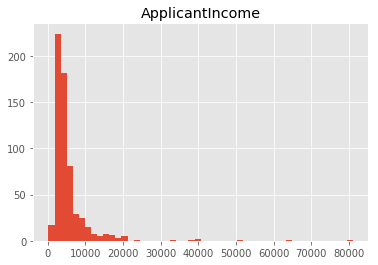

In [17]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50)
plt.show()

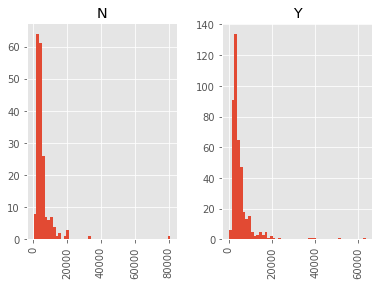

In [18]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50, by='Loan_Status')
plt.show()

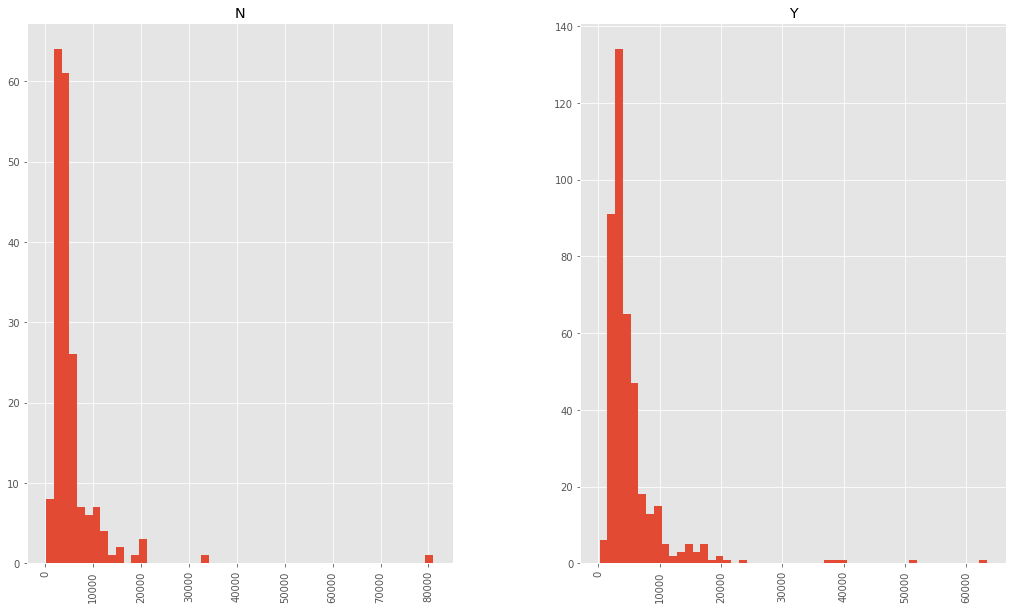

In [19]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50, by='Loan_Status', figsize=(17,10))
plt.show()

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
coapplicants = df['CoapplicantIncome']
coapplicants.head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

### A função abaixo é igual à acima:

def nome_de_funcao(x):

    if x == 0:
    
        return 'N'
    
    else:
    
        return 'Y'

In [22]:
coapplicants = coapplicants.apply(lambda x: 'N' if x == 0 else 'Y')

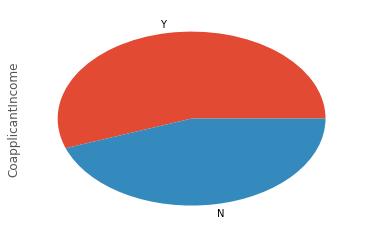

In [23]:
coapplicants.value_counts().plot(kind='pie')
plt.show()

In [24]:
df.drop('Loan_ID', axis=1, inplace=True)

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
df.columns = ['is_Male', 'is_Married', 'Dependents', 'is_Graduated', 'is_Self_Employed',
             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
              'has_Credit_History', 'Property_Area']

ValueError: Length mismatch: Expected axis has 12 elements, new values have 11 elements

In [28]:
df.columns = ['is_Male', 'is_Married', 'Dependents', 'is_Graduated', 'is_Self_Employed',
             'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
              'has_Credit_History', 'Property_Area', 'Loan_Status']

In [29]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
mapper = {'Yes': 1, 'No': 0}
df['is_Married'] = df['is_Married'].map(mapper)

In [31]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
mapper2 = {'Y': 1, 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(mapper2)

In [33]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [34]:
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
is_Graduated           0
Dependents             0
is_Male                0
dtype: int64

## Função para remover dados nulos

df.dropna()

Remove todas as linhas que tenham dados nulos em qualquer campo.

In [35]:
df.dropna(subset=['is_Married'], inplace=True)

In [36]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [37]:
df['LoanAmount'].mean()

146.36949152542374

In [38]:
df['LoanAmount'].median()

127.5

In [39]:
df['LoanAmount'].std()

85.72934322659654

In [40]:
df['LoanAmount'].fillna(df['LoanAmount'].mean())

0      146.369492
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.369492
606    173.000000
607    157.000000
608    108

In [41]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [42]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [43]:
df['has_Credit_History'].value_counts()

1.0    472
0.0     89
Name: has_Credit_History, dtype: int64

In [44]:
df['has_Credit_History'].value_counts().sum()

561

In [45]:
df['has_Credit_History'].count()

561

In [46]:
df['has_Credit_History'].value_counts().index[0]

1.0

In [47]:
df['has_Credit_History'].fillna(1, inplace=True)

In [48]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status           0
Property_Area         0
has_Credit_History    0
Loan_Amount_Term      0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
is_Self_Employed      0
is_Graduated          0
Dependents            0
is_Married            0
is_Male               0
dtype: int64

In [49]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [50]:
df.shape

(611, 12)

In [51]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [52]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [53]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [54]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [55]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [56]:
df.isnull().sum().sort_values(ascending=False)

Property_Area_Urban        0
Property_Area_Semiurban    0
Property_Area_Rural        0
Loan_Status                0
has_Credit_History         0
Loan_Amount_Term           0
LoanAmount                 0
CoapplicantIncome          0
ApplicantIncome            0
is_Self_Employed           0
is_Graduated               0
Dependents                 0
is_Married                 0
is_Male                    0
dtype: int64

In [57]:
df.corr()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.108135,-0.082177,0.010004,0.019381,0.079452,-0.105347,0.031761
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.089280,-0.004520,0.003744,0.000514
Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.163692,-0.103619,-0.038736,0.012593,-0.003147,0.004086,-0.001169
is_Graduated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.166864,0.073701,0.072670,0.084286,-0.075984,0.038022,0.034363
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.115500,-0.033421,-0.000757,-0.002404,0.020858,0.009885,-0.030407
ApplicantIncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.005154,0.016269,-0.016002,0.000756
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.188151,-0.059135,0.012093,-0.057733,0.003860,-0.025199,0.022269
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,1.000000,0.036135,-0.001631,-0.036782,0.043538,-0.008376,-0.033530
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.023619,0.035425,0.058878,-0.095081
has_Credit_History,0.010004,0.009481,-0.038736,0.072670,-0.000757,-0.018900,0.012093,-0.001631,-0.005291,1.000000,0.540021,-0.019637,0.034905,-0.017002


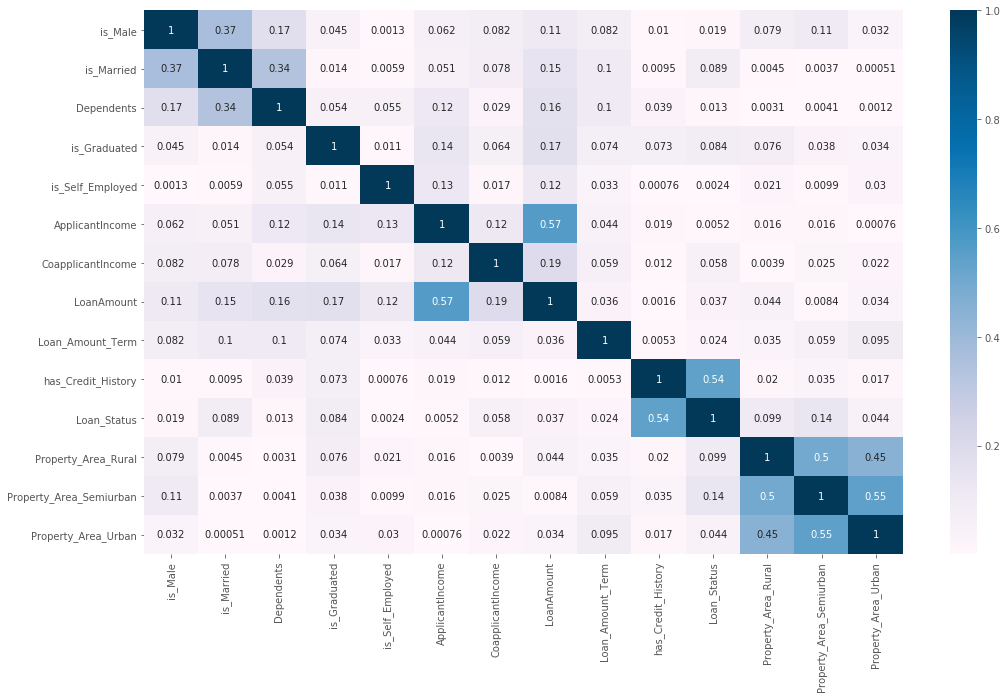

In [58]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr().abs(), annot=True, cmap='PuBu')
plt.show()

In [59]:
from matplotlib.colors import ListedColormap

flatui = ['#FF0000', '#E34646', '#FFFFFF', '#FFFFFF', '#E34646', '#FF0000']
my_cmap = ListedColormap(sns.color_palette(flatui).as_hex())

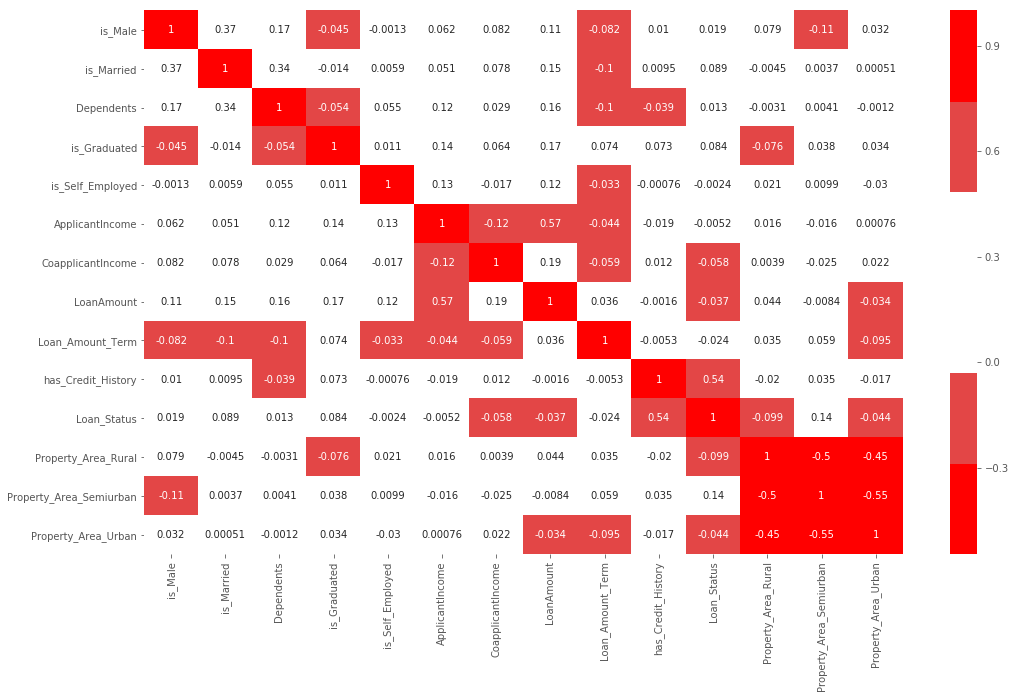

In [60]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap=my_cmap)
plt.show()

In [61]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [62]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [63]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,6000.0


### Normalização de Dados

[Scikit Learn Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [64]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])
df.loc[df['CoapplicantIncome'] == 0, 'CoapplicantIncome'] = 1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [65]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1.0,0.0,0.0,1,0.0,8.674026,0.000000,146.369492,360.0,1.0,1,0,0,1,8.674026
1,1.0,1.0,1.0,1,0.0,8.430109,7.318540,128.000000,360.0,1.0,0,1,0,0,8.714568
2,1.0,1.0,0.0,1,1.0,8.006368,0.000000,66.000000,360.0,1.0,1,0,0,1,8.006368
3,1.0,1.0,0.0,0,0.0,7.856707,7.765569,120.000000,360.0,1.0,1,0,0,1,8.505323
4,1.0,0.0,0.0,1,0.0,8.699515,0.000000,141.000000,360.0,1.0,1,0,0,1,8.699515


In [66]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Score no conjunto de Treino: {0:.2%}'.format(lr.score(X_train, y_train)))
print('Score no conjunto de Teste: {0:.2%}'.format(lr.score(X_test, y_test)))

Score no conjunto de Treino: 80.44%
Score no conjunto de Teste: 82.18%


In [69]:
lr.score(X_train, y_train)

0.80440097799511

In [70]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print('Score no conjunto de Treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score no conjunto de Teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score no conjunto de Treino: 82.64%
Score no conjunto de Teste: 83.17%


In [71]:
dt.feature_importances_

array([0.01066162, 0.        , 0.        , 0.        , 0.        ,
       0.00863591, 0.04342761, 0.02627059, 0.0231181 , 0.72242608,
       0.        , 0.0591404 , 0.        , 0.10631969])

In [72]:
importance = list(zip(dt.feature_importances_, X_train.columns))
importance

[(0.01066161532525964, 'is_Male'),
 (0.0, 'is_Married'),
 (0.0, 'Dependents'),
 (0.0, 'is_Graduated'),
 (0.0, 'is_Self_Employed'),
 (0.00863590841346034, 'ApplicantIncome'),
 (0.04342760972747744, 'CoapplicantIncome'),
 (0.02627059425320548, 'LoanAmount'),
 (0.0231180994359439, 'Loan_Amount_Term'),
 (0.7224260802273454, 'has_Credit_History'),
 (0.0, 'Property_Area_Rural'),
 (0.05914039870676859, 'Property_Area_Semiurban'),
 (0.0, 'Property_Area_Urban'),
 (0.10631969391053918, 'TotalIncome')]

In [73]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print('Score no conjunto de Treino: {0:.2%}'.format(rf.score(X_train, y_train)))
print('Score no conjunto de Teste: {0:.2%}'.format(rf.score(X_test, y_test)))

Score no conjunto de Treino: 98.78%
Score no conjunto de Teste: 75.25%


In [74]:
dt.predict([X_test.iloc[0]])

array([1])

In [75]:
dt.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1])

In [76]:
X_test['Loan_Status'] = dt.predict(X_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
X_test.to_csv('clientes_previstos.csv', index=False)

In [78]:
import pickle
pickle.dump(dt, open('modelo.sav', 'wb'))

In [79]:
modelo = pickle.load(open('modelo.sav', 'rb'))